# Predicting Compressive Strength of Concrete

Dataset: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

In [60]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading dataset
data = pd.read_csv('concrete_data.csv')
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
# checking data types
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [5]:
# checking missing values
data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Data Analysis

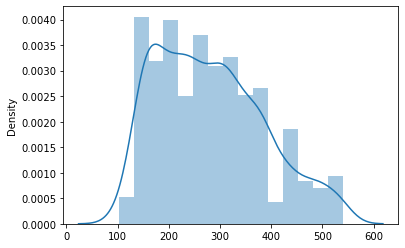

In [17]:
# Cement
sns.distplot(x=data['cement'])
plt.show()

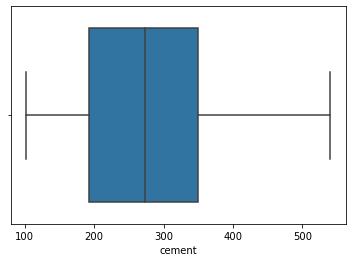

In [18]:
sns.boxplot(x='cement', data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


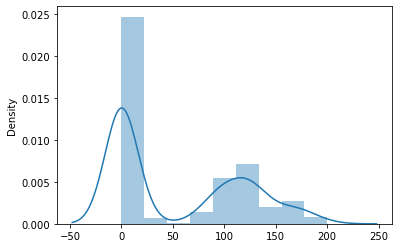

In [20]:
# Ash
sns.distplot(x=data['fly_ash'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


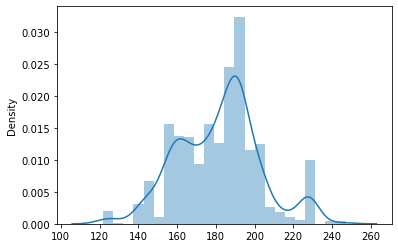

In [21]:
# water
sns.distplot(x=data['water'])
plt.show()

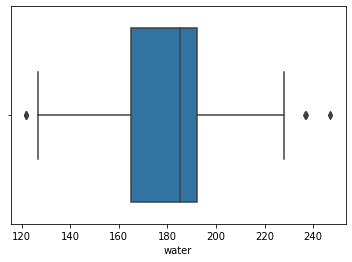

In [23]:
# we have some outliers
sns.boxplot(x='water', data=data)
plt.show()

In [40]:
# how many outliers we have
q1 = data['water'].quantile(q=0.25)
q3 = data['water'].quantile(q=0.75)

l_outliers = q1 - 1.5 * (q3-q1)
u_outliers = q3 + 1.5 * (q3-q1)

print('Lower ourliers in slag: ', l_outliers)
print('Upper outliers in slag: ', u_outliers)

Lower ourliers in slag:  124.25000000000001
Upper outliers in slag:  232.64999999999998


In [42]:
# We have 4 outliers in upper and 5 outliers in lower
print('Number of outliers in upper: ', data[data['water'] > 232.65]['water'].count())
print('Number of outliers in lower: ', data[data['water'] < 124.25]['water'].count())

Number of outliers in upper:  4
Number of outliers in lower:  5


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


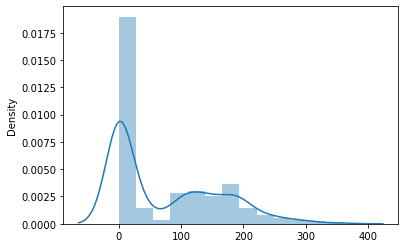

In [43]:
# blast_furnace_slag
sns.distplot(x=data['blast_furnace_slag'])
plt.show()

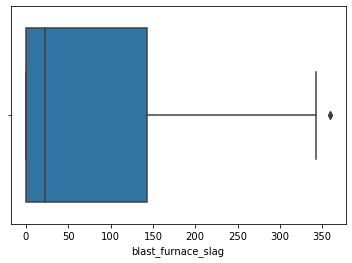

In [44]:
sns.boxplot(x='blast_furnace_slag', data=data)
plt.show()

In [47]:
# how many outliers we have
q1 = data['blast_furnace_slag'].quantile(q=0.25)
q3 = data['blast_furnace_slag'].quantile(q=0.75)

l_outliers = q1 - 1.5 * (q3-q1)
u_outliers = q3 + 1.5 * (q3-q1)

print('Lower ourliers in slag: ', l_outliers)
print('Upper outliers in slag: ', u_outliers)

Lower ourliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [49]:
# We have 2 outliers in upper
print('Number of outliers in upper: ', data[data['blast_furnace_slag'] > 357.375]['blast_furnace_slag'].count())
print('Number of outliers in lower: ', data[data['blast_furnace_slag'] < -214.425]['blast_furnace_slag'].count())

Number of outliers in upper:  2
Number of outliers in lower:  0


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


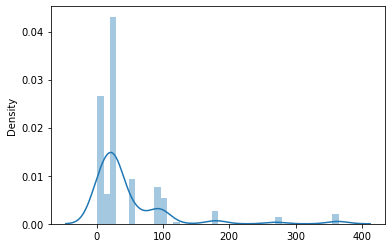

In [50]:
# age
sns.distplot(x=data['age'])
plt.show()

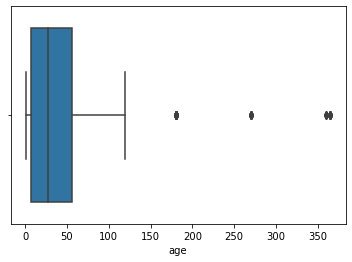

In [51]:
# a lot of outlier, lets check it
sns.boxplot(x='age', data=data)
plt.show()

In [53]:
# how many outliers we have
q1 = data['age'].quantile(q=0.25)
q3 = data['age'].quantile(q=0.75)

l_outliers = q1 - 1.5 * (q3-q1)
u_outliers = q3 + 1.5 * (q3-q1)

print('Lower ourliers in slag: ', l_outliers)
print('Upper outliers in slag: ', u_outliers)

Lower ourliers in slag:  -66.5
Upper outliers in slag:  129.5


In [54]:
# We have 59! outliers in upper
print('Number of outliers in upper: ', data[data['age'] > 129.5]['age'].count())
print('Number of outliers in lower: ', data[data['age'] < -66.5]['age'].count())

Number of outliers in upper:  59
Number of outliers in lower:  0


Lets check our values put together

In [55]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

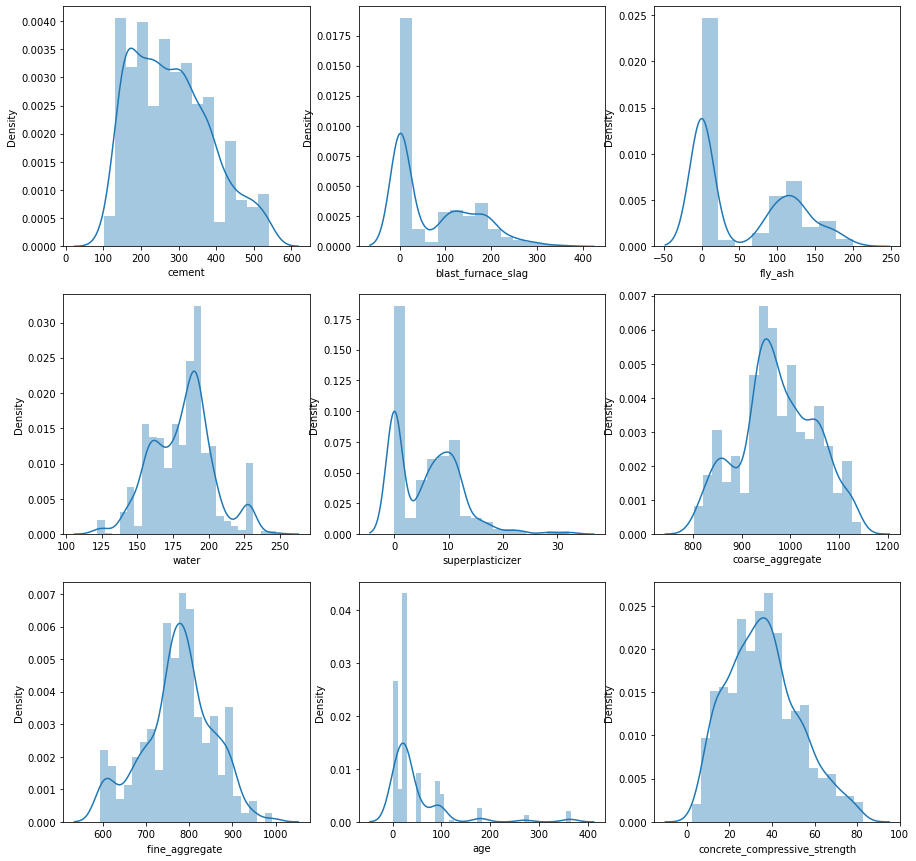

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
sns.distplot(data['cement'], ax=ax[0][0])
sns.distplot(data['blast_furnace_slag'], ax=ax[0][1])
sns.distplot(data['fly_ash'], ax=ax[0][2])
sns.distplot(data['water'], ax=ax[1][0])
sns.distplot(data['superplasticizer'], ax=ax[1][1])
sns.distplot(data['coarse_aggregate'], ax=ax[1][2])
sns.distplot(data['fine_aggregate '], ax=ax[2][0])
sns.distplot(data['age'], ax=ax[2][1])
sns.distplot(data['concrete_compressive_strength'], ax=ax[2][2])
plt.show()

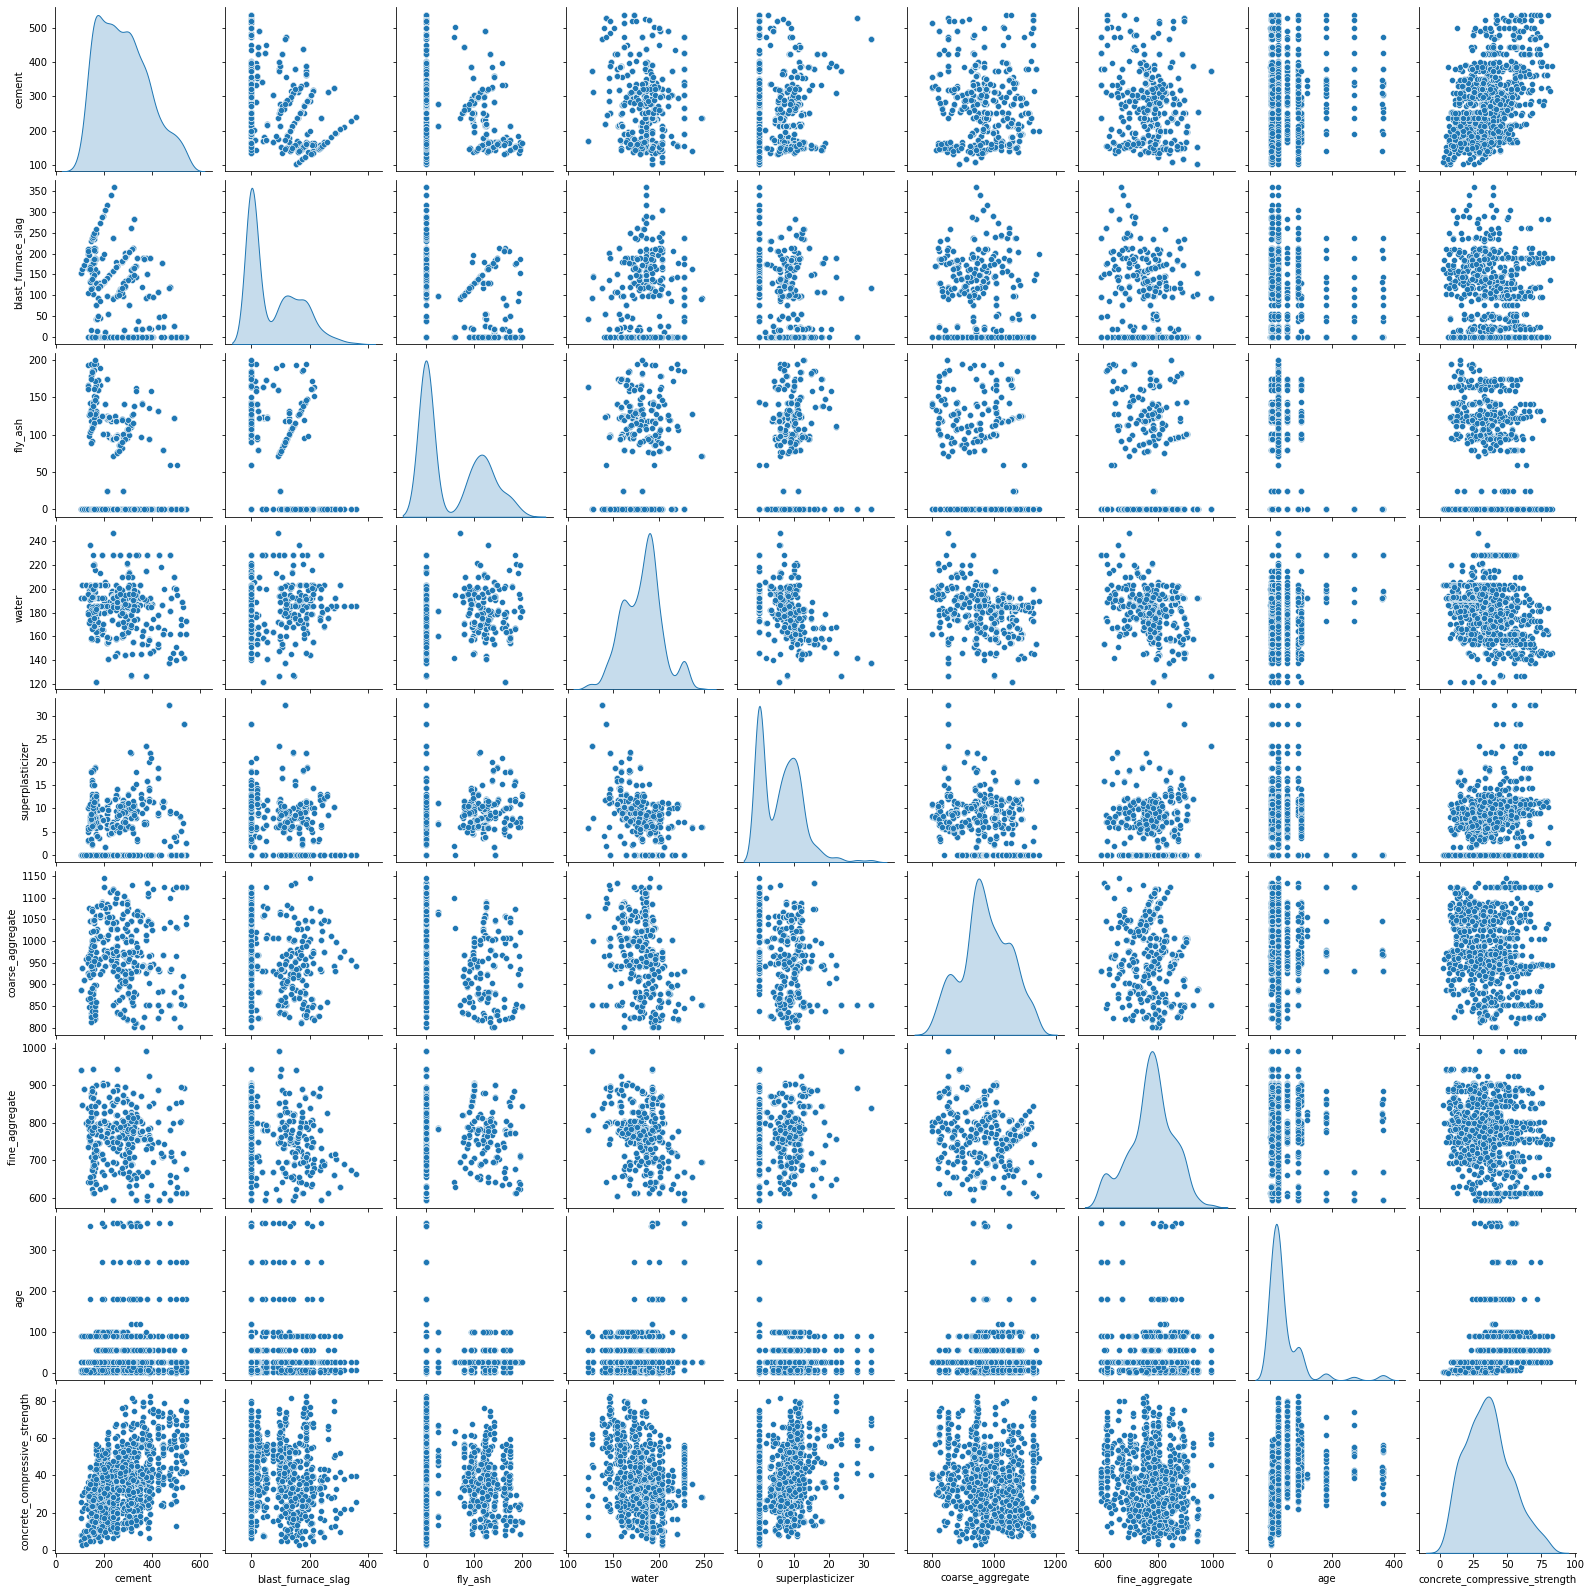

In [62]:
sns.pairplot(data, diag_kind='kde')
plt.show()

Lets check correlation now

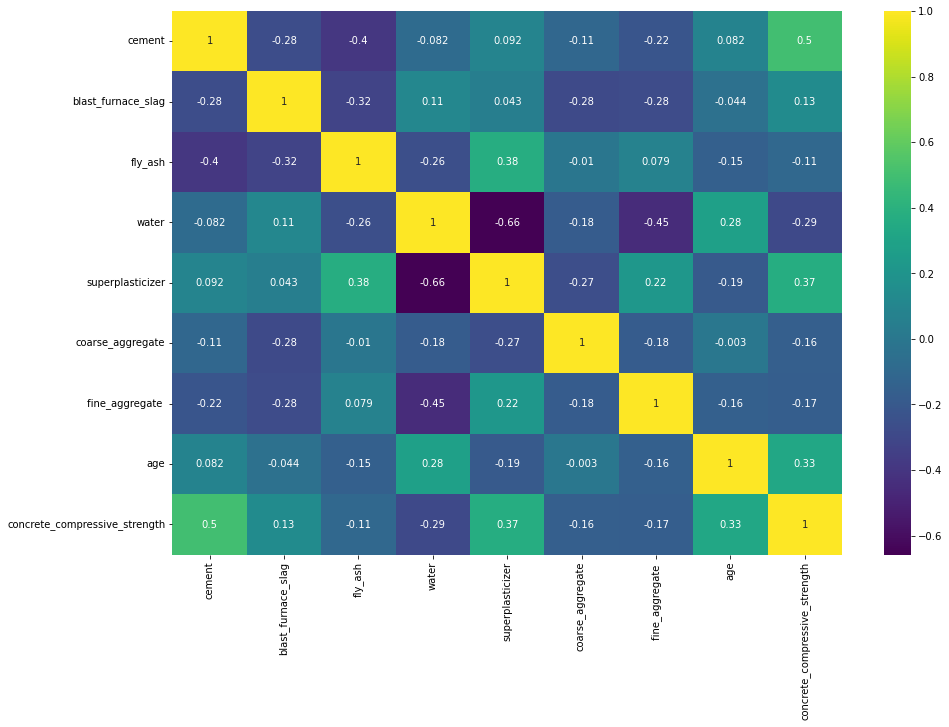

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

In [67]:
# replacing outliers on medians
for col in data.columns[:-1]:
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    
    low = q1 - 1.5 * (q3 - q1)
    high = q3 + 1.5 * (q3 - q1)
    data.loc[(data[col] < low) | (data[col] > high), col] = data[col].median()

In [68]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [70]:
# splitting on dependent and independent variables
x = data.drop('concrete_compressive_strength', axis=1)
y = data['concrete_compressive_strength']

In [72]:
# scaling training data
from scipy.stats import zscore

x_scaled = x.apply(zscore)

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=1)

# Building Models

1. Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.981241949740648
Testing score:  0.8810966011430865


In [89]:
from sklearn import metrics

y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

31.165436827560644

In [90]:
# Acc for selected algorithms
acc_rf = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_rf}, index={'1'})
res = results[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097


2. Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9477368610390589
Testing score:  0.8803923330523546


In [92]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

31.350030564176894

In [93]:
acc_gb = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Gradient Boosting'], 'accuracy': acc_gb}, index={'2'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392


3. Ada Boosting

In [94]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.8323699017065422
Testing score:  0.7635192160131616


In [95]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

61.98331591128694

In [96]:
acc_ab = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Ada Boosting'], 'accuracy': acc_ab}, index={'3'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519


4. KNN

In [97]:
from sklearn.neighbors import KNeighborsRegressor

# checking which K will be the best
ks = []

for i in range(3, 31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    scr = model.score(x_test, y_test)
    ks.append(scr)

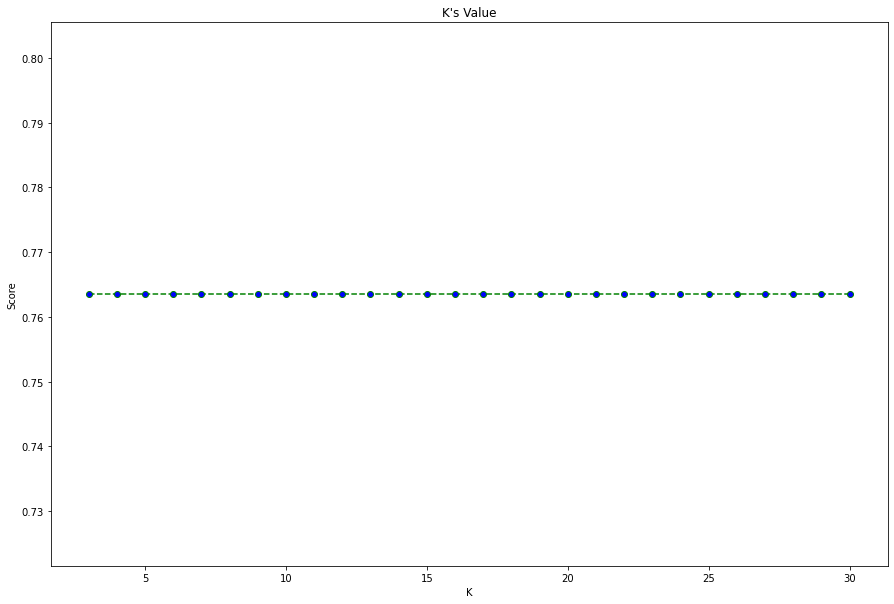

In [108]:
plt.figure(figsize=(15, 10))
plt.plot(range(3, 31), ks, color='green', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.title("K's Value")
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [113]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9069857173257587
Testing score:  0.7538075164015781


In [114]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

64.52882229413879

In [115]:
acc_knn = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['KNN'], 'accuracy': acc_knn}, index={'4'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808


5. Bagging

In [116]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9727392965000429
Testing score:  0.8718673144111667


In [117]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

33.58449932175583

In [118]:
acc_bag = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Bagging'], 'accuracy': acc_bag}, index={'5'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867


6. SVR

In [119]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.7296525761559521
Testing score:  0.6549962611822545


In [120]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

90.4279636306755

In [121]:
acc_svm = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['SVM'], 'accuracy': acc_svm}, index={'6'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867
6,SVM,0.654996


7. XGBoost

In [122]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9924341146964205
Testing score:  0.9004226612596836


In [123]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

26.09993734243447

In [124]:
acc_xgb = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['XGBoost'], 'accuracy': acc_xgb}, index={'7'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867
6,SVM,0.654996
7,XGBoost,0.900423


8. Decision Tree

In [125]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9930841416603411
Testing score:  0.7560920217997245


In [126]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

63.930036983099605

In [129]:
acc_dt = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Decision Tree'], 'accuracy': acc_dt}, index={'8'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867
6,SVM,0.654996
7,XGBoost,0.900423
8,Decision Tree,0.756092


9. Extra Trees

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x_train, y_train)

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.9930841416603411
Testing score:  0.8867349057258589


In [133]:
y_pred = model.predict(x_test)
metrics.mean_squared_error(y_test, y_pred)

29.687596606185657

In [134]:
acc_et = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Extra Trees'], 'accuracy': acc_et}, index={'9'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867
6,SVM,0.654996
7,XGBoost,0.900423
8,Decision Tree,0.756092
9,Extra Trees,0.886735


Let's take those algorithms that have more than 85% on testing data and stack them

In [139]:
res[res['accuracy'] > 0.85]

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
5,Bagging,0.871867
7,XGBoost,0.900423
9,Extra Trees,0.886735


In [140]:
from sklearn.ensemble import StackingRegressor

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
bg = BaggingRegressor()
xgb = XGBRegressor()
et = ExtraTreesRegressor()

final = XGBRegressor()
clf = [('rf', rf), ('gb', gb), ('bg', bg), ('xgb', xgb), ('et', et)]

model = StackingRegressor(estimators=clf, final_estimator=final)

In [141]:
model.fit(x_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor()),
                              ('bg', BaggingRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None,
                                               reg_alpha=None, reg_lambda=None, ...))

In [142]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training score:  0.961625677666833
Testing score:  0.8795355497188316


In [143]:
acc_st = model.score(x_test, y_test)
results = pd.DataFrame({'Algorithm': ['Stacking'], 'accuracy': acc_st}, index={'10'})
res = pd.concat([res, results])
res = res[['Algorithm', 'accuracy']]
res

,Algorithm,accuracy
1,Random Forest,0.881097
2,Gradient Boosting,0.880392
3,Ada Boosting,0.763519
4,KNN,0.753808
5,Bagging,0.871867
6,SVM,0.654996
7,XGBoost,0.900423
8,Decision Tree,0.756092
9,Extra Trees,0.886735
10,Stacking,0.879536


Let's check which model has the best acc, and choose hyperparameters for him

In [162]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()
parameters = [{'n_estimators': [500, 1000, 1500, 2000], 'max_depth': [i for i in range(1, 6)]}]
rnd = RandomizedSearchCV(model, parameters, cv=20, return_train_score=True)
rnd.fit(x_train, y_train)

RandomizedSearchCV(cv=20,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5],
                                         'n_estimators': [500, 1000, 1500,
                                                          2000]}],
                   return_train_score=True)

In [163]:
rnd.best_score_

0.9141516653040096

In [164]:
rnd.best_params_

{'n_estimators': 1000, 'max_depth': 2}

In [165]:
final_model = XGBRegressor(n_estimators=1000, max_depth=2)
final_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [166]:
print('Training score: ', final_model.score(x_train, y_train))
print('Testing score: ', final_model.score(x_test, y_test))

Training score:  0.9829665488440265
Testing score:  0.9106370547419962


In [169]:
import joblib

joblib.dump(final_model, 'Final_Model')

['Final_Model']